This works on skewwd distribution data. If we got from boxplot any value outside of (Q1-1.5IQR & Q3+1.5TQR) then those values will be the outliers.

IQR Proximity Rule :
Maximum - Q3+1.5TQR
Minimum - Q1-1.5TQR

We can remove this outliers using Trimming or Capping.
1. In trimming, we will remove all the ouliers. But there is a problem that, jodi outliers onek beshi ber hoy tahole ta trim kore felle,ekta significant portion delete hoye jabe.
2. In capping, outliers jodi ashe tahole amra capping kore feli. Like, range 3 theke -3 jodi hoy, tahole er cheye boro value ashle amra highest value 3 diye take replace korbo, ar jodi choto value ashe tahole lowest value -3 diye replace korbo.

# CODE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
612,6.14,60.0,1
356,5.91,50.0,1
288,7.07,21.0,0
181,7.30,42.0,0
247,6.25,49.0,0


C:\Users\USER\AppData\Local\Temp\ipykernel_6840\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6840\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


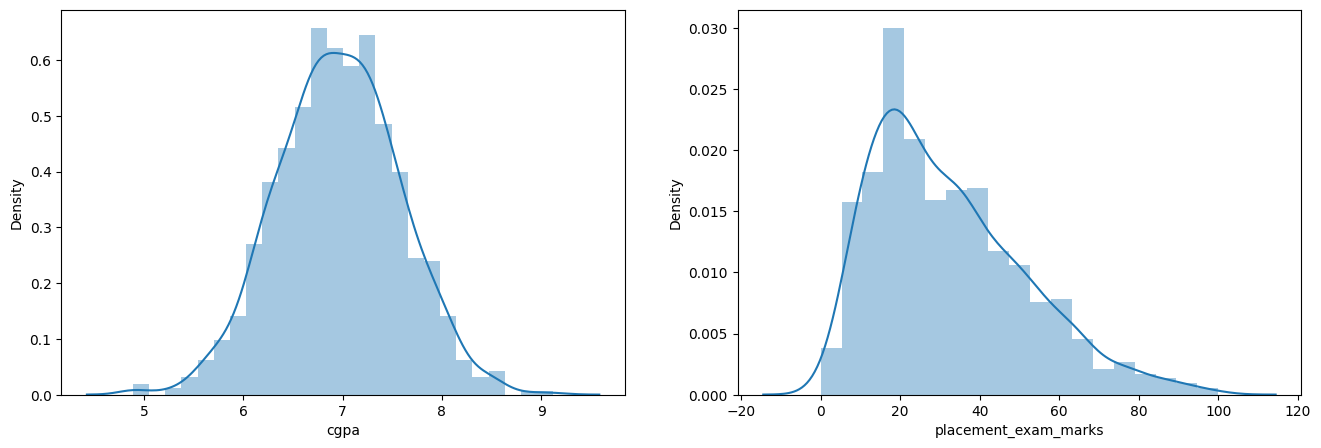

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

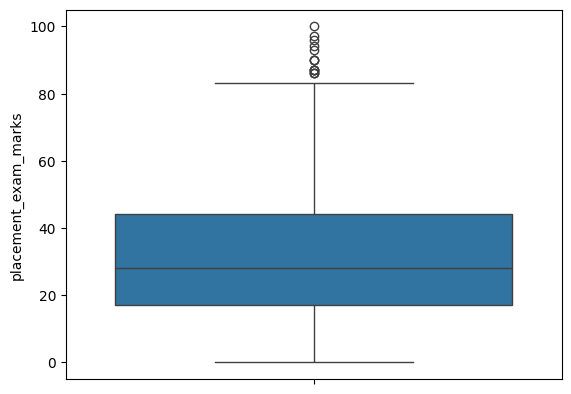

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [11]:
percentile75

44.0

In [12]:
iqr = percentile75-percentile25

In [13]:
iqr

27.0

In [14]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [15]:
print("Upper Limit: ",upper_limit)
print("Lower Limit: ",lower_limit)

Upper Limit:  84.5
Lower Limit:  -23.5


## Finding Outliers

In [16]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trimming

In [20]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [21]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [22]:
new_df.shape

(985, 3)

C:\Users\USER\AppData\Local\Temp\ipykernel_6840\3608418273.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6840\3608418273.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


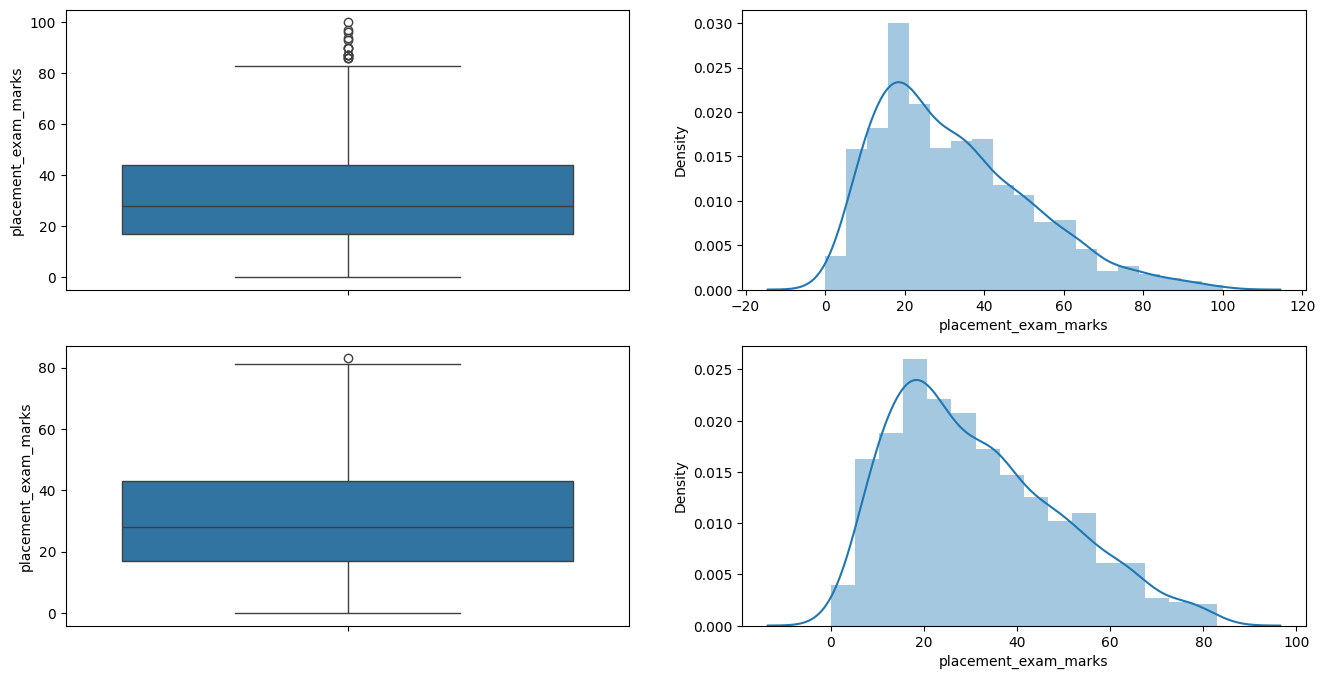

In [27]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.distplot(new_df['placement_exam_marks'])

plt.show()

## Caping

In [28]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [29]:
new_df_cap.shape

(1000, 3)

C:\Users\USER\AppData\Local\Temp\ipykernel_6840\2865787726.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6840\2865787726.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


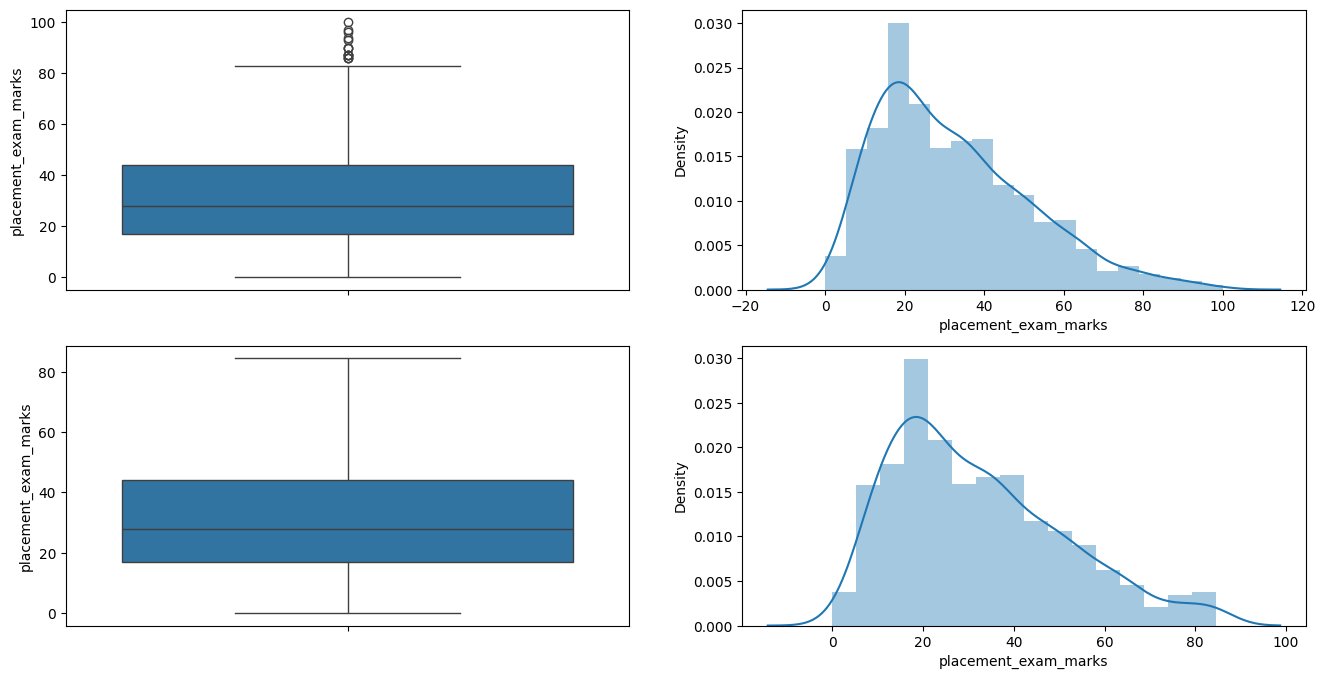

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.show()